In [1]:
import numpy as np
import matplotlib.pyplot as plt

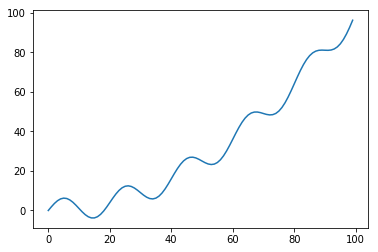

In [2]:
def basic_sequence(N):
    tvals = np.arange(0,N,1)
    sinCoeff = 0.1*np.pi
    yvals = 0.01*tvals*tvals + 6*np.sin(sinCoeff*tvals)
    
    return tvals, yvals


t, y = basic_sequence(100)
plt.plot(t,y)

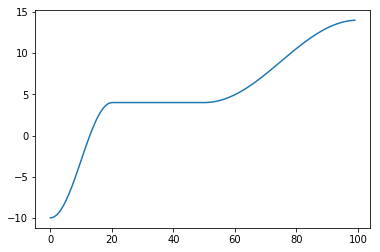

In [3]:
def spline(indices, vals):
    assert(len(indices)==len(vals))
    ranges = []
    for i in range(0,len(indices)-1):
        period = indices[i+1]-indices[i]
        t = np.arange(0,period)
        initial = vals[i]
        final = vals[i+1]
        
        coeff = (2*np.pi)/(2*period)
        amplitude = (final-initial)/2
        #if initial < final:
        y = amplitude*(1-np.cos(coeff*t))+initial
        #elif final < initial:
          #  y = (final-initial)*np.cos(coeff*t)+initial
        #else:
        #    y = np.array([final for k in range(period)])
        ranges.append(y)
    return np.concatenate(ranges)
        
seq = spline([0,20,50,100], [-10,4,4,14])
plt.plot(np.arange(len(seq)),seq)

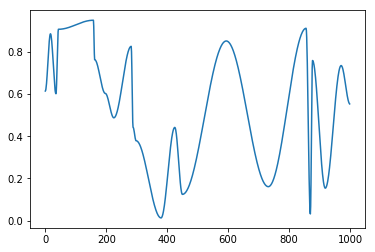

In [4]:
inds = np.unique(np.concatenate((np.random.randint(0,1000,20),np.array([0,1000]))))
seq = spline(inds, np.random.rand(len(inds)))
plt.plot(np.arange(len(seq)),seq)

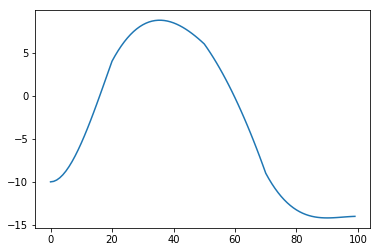

In [61]:
def cubicSpline(indices, y, yprime):
    assert(len(indices)==len(y))
    assert(len(yprime)==len(y))
    Minv = np.linalg.inv(np.array([[1,0,0,0],[1,1,1,1],[0,1,0,0],[0,1,2,3]]))
    pts = []
    for i in range(len(y)-1):
        targets = np.array([y[i],y[i+1],yprime[i],yprime[i+1]])
        coeffs = np.dot(Minv, targets)
        r = indices[i+1]-indices[i]
        s = np.arange(r)/r
        yvals = coeffs[3]*s*s*s+coeffs[2]*s*s+coeffs[1]*s+coeffs[0]
        pts.append(yvals)
        
    return np.concatenate(pts)

seq = cubicSpline([0,20,50,70,100], [-10,4,6,-9,-14],[0,20,-10,-20,0])
plt.plot(np.arange(len(seq)), seq, '-')

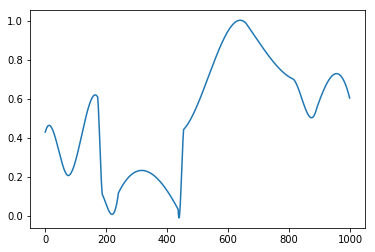

In [22]:
inds = np.unique(np.concatenate((np.random.randint(0,1000,10),np.array([0,1000]))))
seq = cubicSpline(inds, np.random.rand(len(inds)), 2*np.random.rand(len(inds))-1)
plt.plot(np.arange(len(seq)),seq)

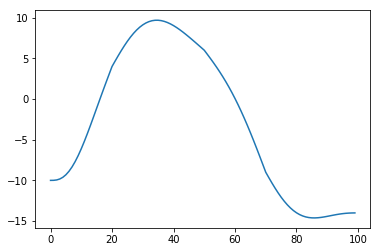

In [59]:
def quinticSpline(indices, y, yprime, yprimeprime):
    assert(len(indices)==len(y))
    assert(len(yprime)==len(y))
    assert(len(yprimeprime)==len(y))
    
    # The round and divide fixes slight numerical errors and is probably unnecessary
    Minv = np.round(2*np.linalg.inv(np.array([[1,0,0,0,0,0],[1,1,1,1,1,1],[0,1,0,0,0,0],
                                   [0,1,2,3,4,5],[0,0,2,0,0,0],[0,0,2,6,12,20]])))/2
    
    pts = []
    for i in range(len(y)-1):
        targets = np.array([y[i],y[i+1],yprime[i],yprime[i+1],yprimeprime[i],yprimeprime[i+1]])
        coeffs = np.dot(Minv, targets)
        r = indices[i+1]-indices[i]
        s = np.arange(r)/r
        s2 = s*s
        s3 = s*s2
        s4 = s*s3
        s5 = s*s4
        yvals = coeffs[5]*s5 + coeffs[4]*s4 + coeffs[3]*s3+coeffs[2]*s2+coeffs[1]*s+coeffs[0]
        pts.append(yvals)
        
    return np.concatenate(pts)

seq = quinticSpline([0,20,50,70,100], [-10,4,6,-9,-14],[0,20,-10,-20,0],[0,1,-1,1,0])
plt.plot(np.arange(len(seq)), seq, '-')

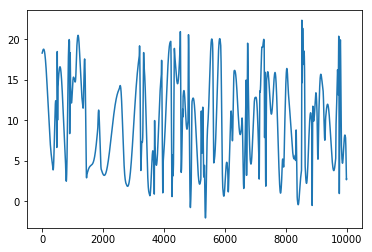

In [60]:
inds = np.unique(np.concatenate((np.random.randint(0,10000,100),np.array([0,10000]))))
seq = quinticSpline(inds, 20*np.random.rand(len(inds)), 20*(2*np.random.rand(len(inds))-1), 20*(2*np.random.rand(len(inds))-1))
plt.plot(np.arange(len(seq)),seq)

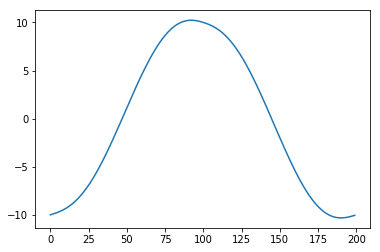

In [38]:
seq = quinticSpline([0,100,200], [-10,10,-10],[5,-5,5],[3,-30,3])
plt.plot(np.arange(len(seq)), seq, '-')

In [57]:
    #np.set_printoptions(precision=2)
    M = np.array([[1,0,0,0,0,0],[1,1,1,1,1,1],[0,1,0,0,0,0],
                                   [0,1,2,3,4,5],[0,0,2,0,0,0],[0,0,2,6,12,20]])
    Minv = np.linalg.inv(np.array([[1,0,0,0,0,0],[1,1,1,1,1,1],[0,1,0,0,0,0],
                                   [0,1,2,3,4,5],[0,0,2,0,0,0],[0,0,2,6,12,20]]))
    print(M)
    print(np.round(2*Minv)/2)
    #print(np.round(Minv))
    print(np.round(20*np.dot(Minv,M))/20)
    print(np.linalg.norm(np.dot(Minv,M)-np.eye(6)))
    print(np.dot(M,np.round(2*Minv)/2))

[[ 1  0  0  0  0  0]
 [ 1  1  1  1  1  1]
 [ 0  1  0  0  0  0]
 [ 0  1  2  3  4  5]
 [ 0  0  2  0  0  0]
 [ 0  0  2  6 12 20]]
[[  1.    0.    0.    0.    0.    0. ]
 [ -0.    0.    1.   -0.    0.   -0. ]
 [  0.    0.    0.    0.    0.5   0. ]
 [-10.   10.   -6.   -4.   -1.5   0.5]
 [ 15.  -15.    8.    7.    1.5  -1. ]
 [ -6.    6.   -3.   -3.   -0.5   0.5]]
[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  1. -0. -0. -0. -0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0. -0. -0.  1.  0.  0.]
 [ 0.  0.  0. -0.  1. -0.]
 [ 0.  0. -0.  0.  0.  1.]]
1.249185926169645e-14
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [62]:
Minv2 = np.linalg.inv(np.array([[1,0,0,0],[1,1,1,1],[0,1,0,0],[0,1,2,3]]))
print(Minv2)

[[ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [-3.  3. -2. -1.]
 [ 2. -2.  1.  1.]]


hello
